# Red Wine Quality - Binary Classification Problem with SVM

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#sns.set_palette('Greens_d')

Let's begin. Read data into pandas DataFrame, check head of our data and take a look whether we have any missing data in dataset.

In [2]:
wine = pd.read_csv('Data/winequality-red.csv')

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


We are lucky, there is no missing data. Now we check documentation of Red Wine Quality Dataset.

## Context

This datasets is related to red variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

The datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).

This dataset is also available from the UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality , I just shared it to kaggle for convenience. (If I am mistaken and the public license type disallowed me from doing so, I will take this down if requested.)

## Content

For more information, read [Cortez et al., 2009]. Input variables (based on physicochemical tests): 1 - fixed acidity 2 - volatile acidity 3 - citric acid 4 - residual sugar 5 - chlorides 6 - free sulfur dioxide 7 - total sulfur dioxide 8 - density 9 - pH 10 - sulphates 11 - alcohol Output variable (based on sensory data): 12 - quality (score between 0 and 10)

## Tips

What might be an interesting thing to do, is aside from using regression modelling, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'. This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value. Without doing any kind of feature engineering or overfitting you should be able to get an AUC of .88 (without even using random forest algorithm)


## Inspiration

Use machine learning to determine which physiochemical properties make a wine 'good'!

## Acknowledgements

This dataset is also available from the UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality , I just shared it to kaggle for convenience. (I am mistaken and the public license type disallowed me from doing so, I will take this down at first request. I am not the owner of this dataset.

Please include this citation if you plan to use this database: P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

## Relevant publication

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

## Column description

- __Fixed acidity__ - most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
- __Volatile acidity__ - the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
- __Citric acid__ - found in small quantities, citric acid can add 'freshness' and flavor to wines
- __Residual sugar__ - the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet
- __Chlorides__ - the amount of salt in the wine
- __Free sulfur dioxide__ - the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine
- __Total sulfur dioxide__ - amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
- __Density__ - the density of water is close to that of water depending on the percent alcohol and sugar content
- __pH__ -describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
- __Sulphates__ - a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant
- __Alcohol__ - the percent alcohol content of the wine
- __Quality__ - output variable (based on sensory data, score between 0 and 10)

Let's check how our 'quality' columns looks like and how we can split data in sensible way to have only two classes (we want to consider only binary classification).

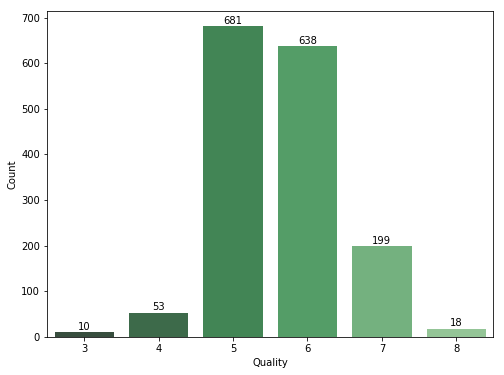

In [5]:
plt.figure(figsize = (8,6))
ax = sns.countplot(data = wine, x = 'quality', palette = 'Greens_d')

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + p.get_width()/2.,
            y = height + 5,
            s = height,
            ha = "center")
    
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

We could see that the best split of _Quality_ column will be between 5 and 6 because we will have well-balanced dataset. Let's do this!

In [6]:
wine['good_wine'] = (wine['quality'] > 5).astype(int)

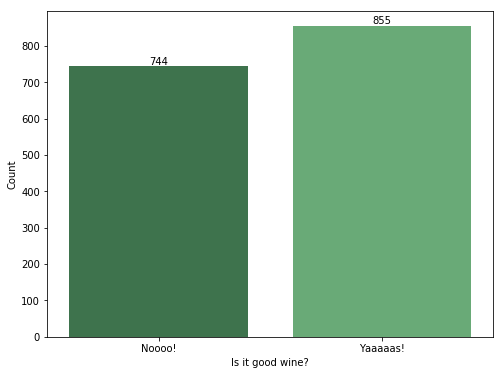

In [7]:
plt.figure(figsize = (8,6))
ax = sns.countplot(data = wine, x = 'good_wine', palette = 'Greens_d')

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + p.get_width()/2.,
            y = height + 5,
            s = height,
            ha = "center")
    
plt.xlabel('Is it good wine?')
plt.ylabel('Count')
plt.xticks([0,1], ['Noooo!', 'Yaaaaas!'])
plt.show()

Here we have our well-balanced dataset. Now we can drop useless _Quality_ column and start EDA.

In [8]:
wine.drop(['quality'], axis = 1, inplace = True)

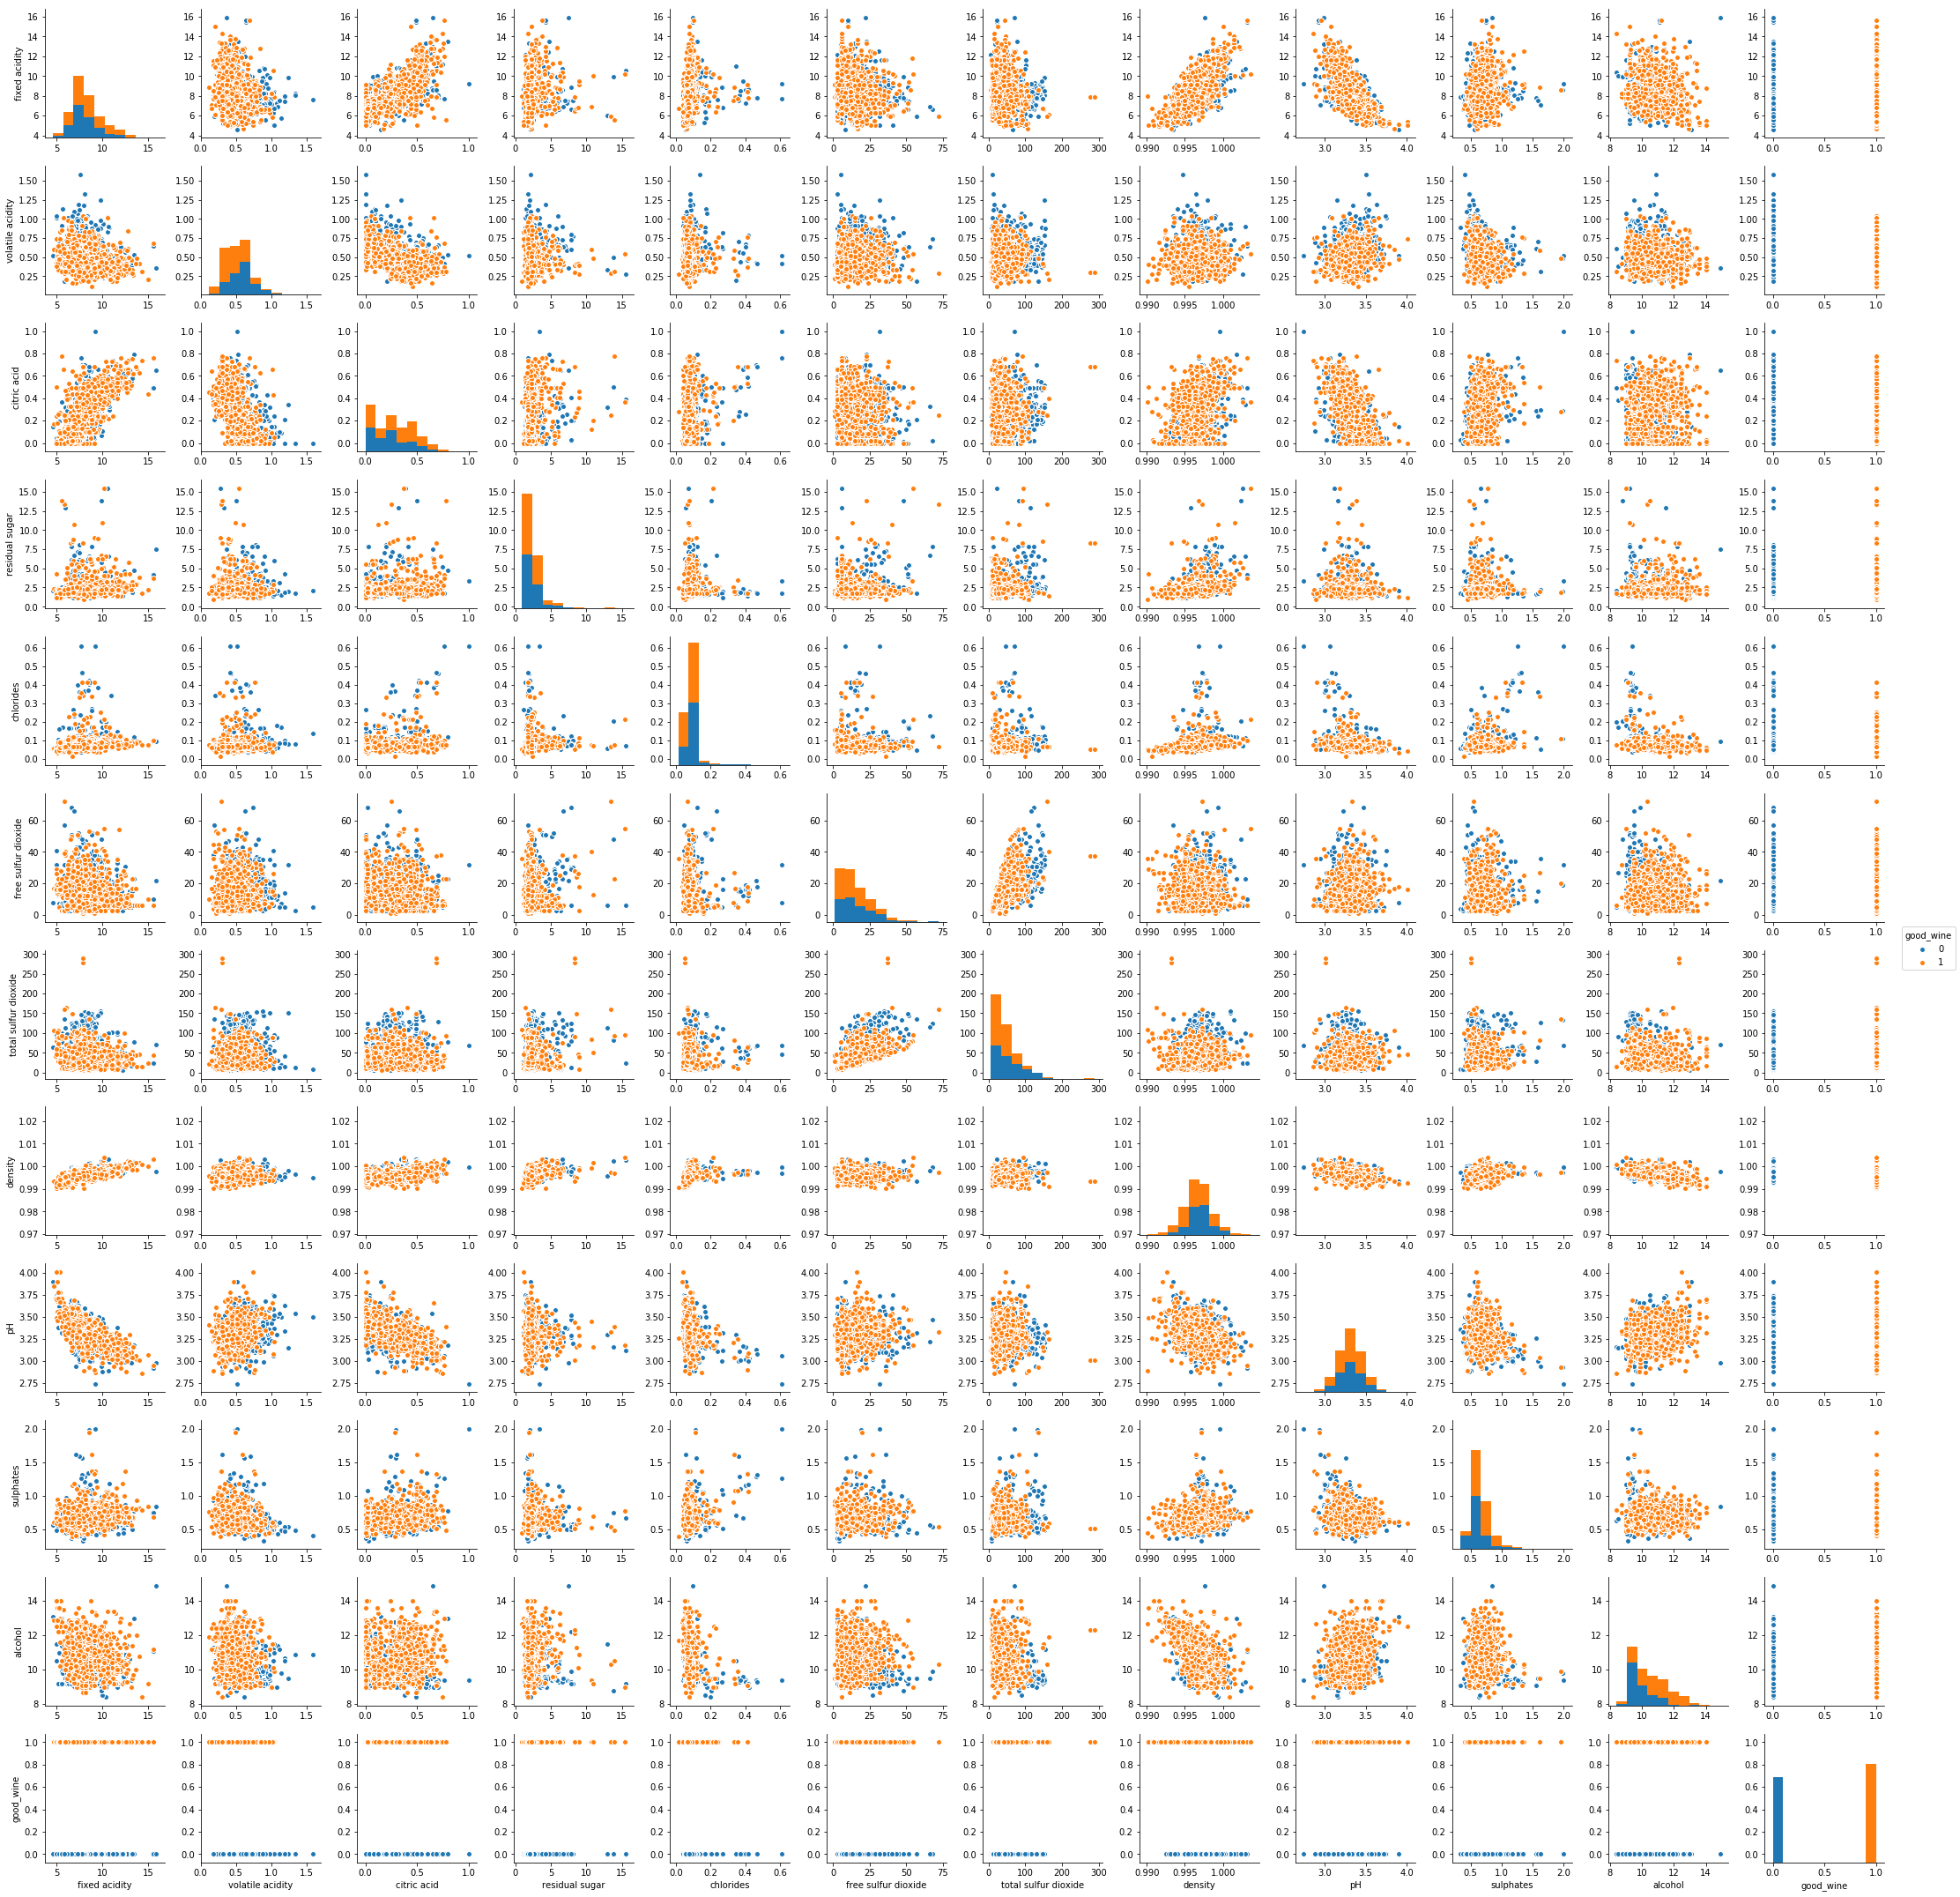

In [9]:
sns.pairplot(wine, hue = 'good_wine')
plt.show()

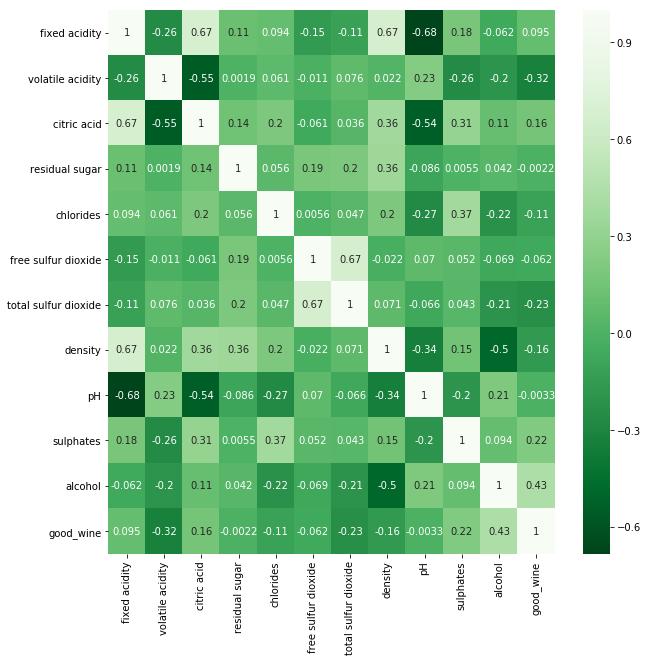

In [10]:
plt.figure(figsize = (10,10))

sns.heatmap(wine.corr(), annot = True, cmap = 'Greens_r')

plt.show()

From heatmap we would like to check more carefully correlations between:
- Fixed Acidity vs. pH
- Fixed Acidity vs. Citric Acid
- Fixed Acidity vs. Density

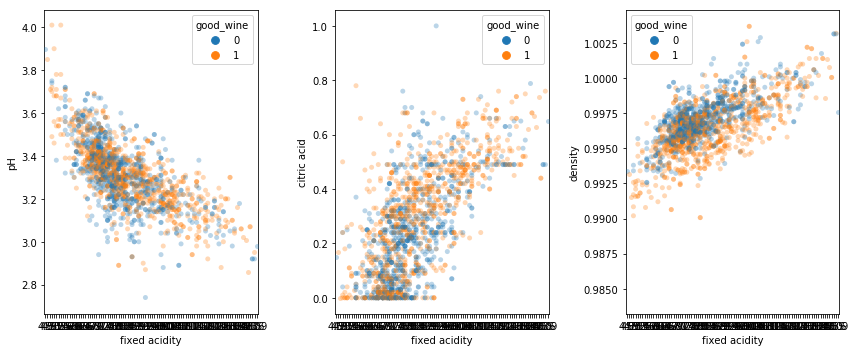

In [11]:
plt.figure(figsize = (12,5))

for idx, y in enumerate(['pH', 'citric acid', 'density']):
    plt.subplot(1,3,idx+1)
    sns.stripplot(data = wine, x = 'fixed acidity', y = y, hue = 'good_wine', alpha = 0.3)
  
plt.tight_layout()
plt.show()

We would like to check what makes good wine good so let's chceck distrbution of different features in terms of quality of wine.

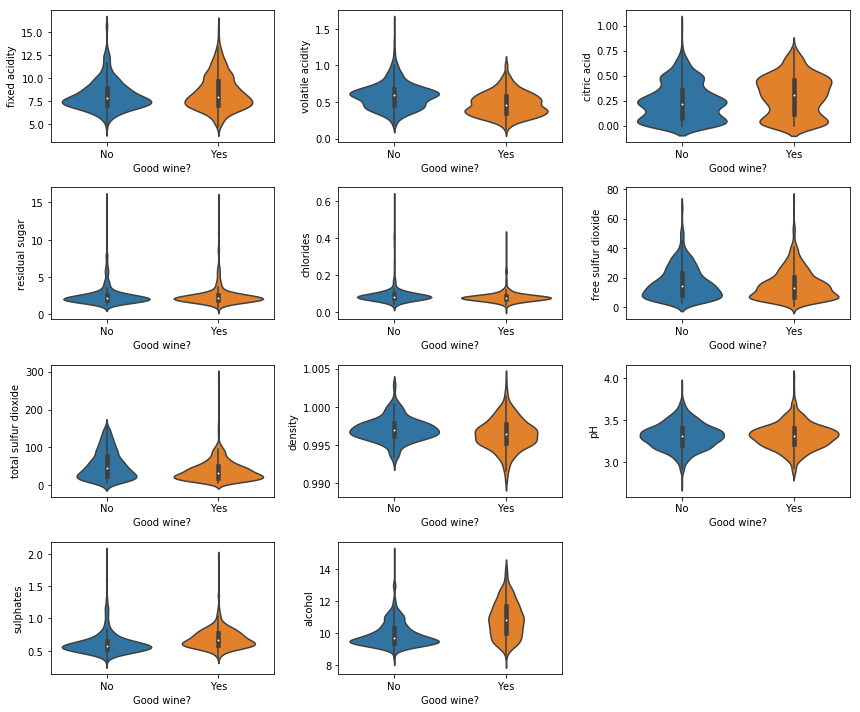

In [26]:
plt.figure(figsize = (12, 10))

for idx, column in enumerate(wine.drop('good_wine', axis = 1).columns):
    plt.subplot(4, 3, idx+1)
    sns.violinplot(data = wine, x = 'good_wine', y = column)
    plt.xlabel('Good wine?')
    plt.xticks([0,1], ['No', 'Yes'])

plt.tight_layout()
plt.show()